In [13]:
import os
import pandas as pd
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
from matplotlib import pyplot as plt
from numpy import median

class Pres:
    def __init__(self, name, flist=[], slist=None, param=None):
        self.name = name
        self.flist = flist
        if slist: self.slist = slist
        if param: self.param = param
            
        self.fig, self.ax = plt.subplots(figsize=(24, 10))
        self.ax.grid(True)
        self.ax.xaxis.label.set_size(33)
        self.ax.yaxis.label.set_size(33)
        self.ax.xaxis.set_tick_params(labelsize=25)
        self.ax.yaxis.set_tick_params(labelsize=25)
        
    
    def plot(self):
        self.ax.plot(self.flist)
        
    def hist(self, *args, **kwargs):
        if kwargs["xlabel"]: 
            self.ax.set_xlabel(kwargs["xlabel"])
            del kwargs["xlabel"]
        if kwargs["ylabel"]: 
            self.ax.set_ylabel(kwargs["ylabel"])
            del kwargs["ylabel"]
        if kwargs["title"]: 
            self.ax.set_title(kwargs["title"], fontsize=35)
            del kwargs["title"]
        self.ax.hist(self.flist, **kwargs)
        
    def save(self, fmt='png'):
        pwd = os.getcwd()
        iPath = 'pictures'
        if not os.path.exists(iPath):
            os.mkdir(iPath)
        os.chdir(iPath)
        plt.savefig(f'{self.name}.{fmt}', fmt='png')
        os.chdir(pwd)
        

class Seqs:
    def __init__(self, path):
        self.seq = []
        self.load_csv(path)
        
    def load_csv(self, path):
        try:
            seq_df = pd.read_csv(path)
            for index, row in seq_df.iterrows():
                self.seq.append(list(map(lambda x: int(x), row.values[1].split(","))))
            return True
        except Exception as exc:
            print(f"{self.__class__.__name__}:load_csv {exc}")
            return False
    
    def to_list(self):
        return self.seq
    
    def seqs_len(self):
        return [len(seq) for seq in self.seq]
    
    def num_digit(self):
        return list(map(lambda x: len(str(x)), [max(seq, key=lambda x: len(str(x))) for seq in self.seq ]))
        


In [2]:
pres = Seqs("../../data/kaggle_test.csv")

Number of sequences: 113845
Number of numbers: 4614863
Max: 347
Mode: 15
But sequences of 98 and 105 numbers are as common as mode


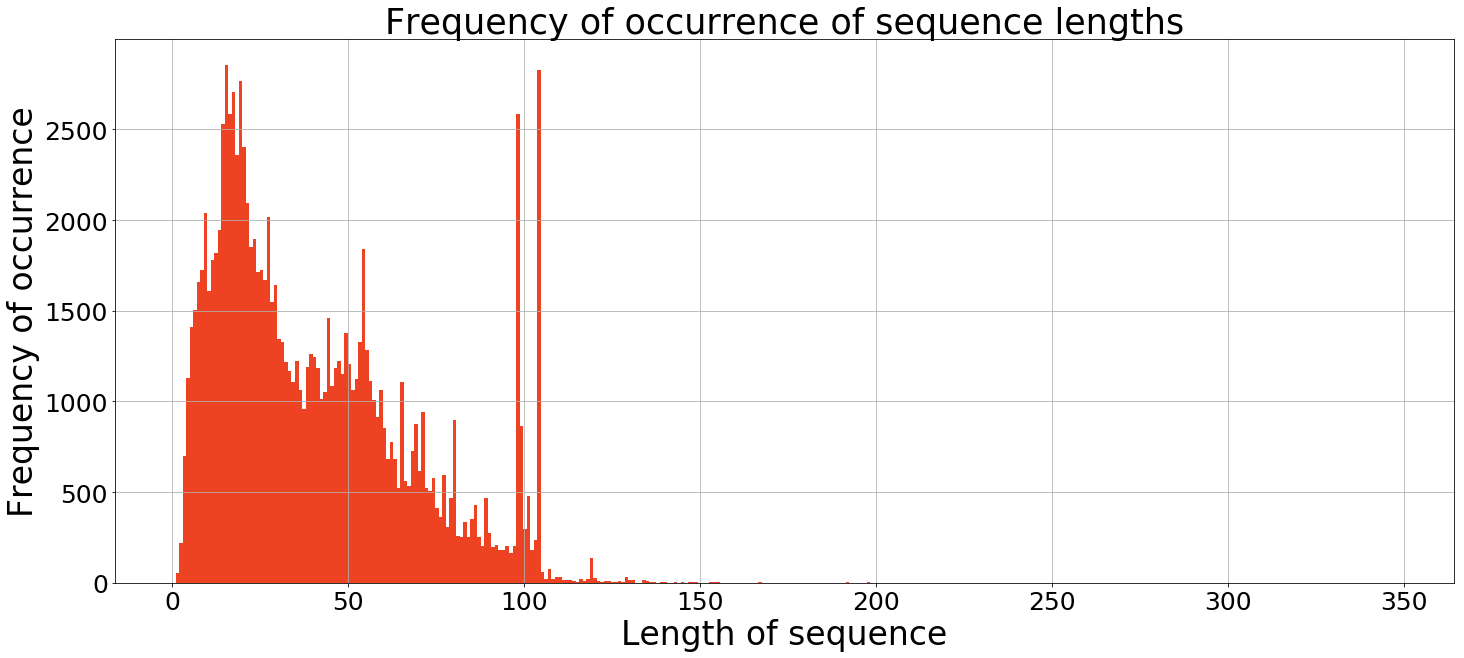

In [16]:
seqslen = pres.seqs_len()
print("Number of sequences: " + str(len(seqslen)))
print("Number of numbers: 4614863")
print("Max: " + str(max(seqslen)))
print("Mode: " + str(max(set(seqslen), key=seqslen.count)))
print("But sequences of 98 and 105 numbers are as common as mode")

preslen = Pres("seqs_len", seqslen)
preslen.hist(bins = 347, width=1, color="#ed4322",
             xlabel="Length of sequence", 
             ylabel="Frequency of occurrence", 
             title="Frequency of occurrence of sequence lengths")
preslen.save()

In [4]:
seqsnumdigit = pres.num_digit()

Max: 206
Median: 5.0


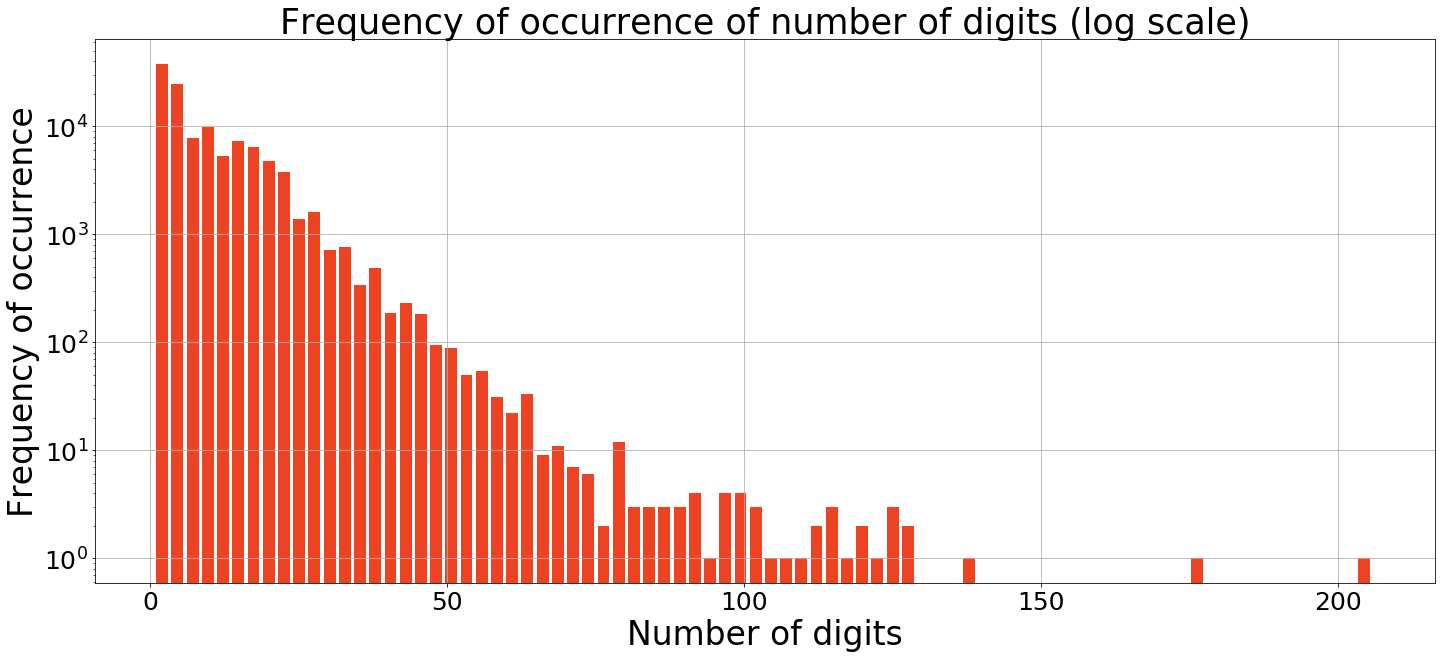

In [17]:
print("Max: " + str(max(seqsnumdigit)))
print("Median: " + str(np.median(seqsnumdigit)))


preslen = Pres("seqs_num_digits", seqsnumdigit)
preslen.hist(bins = 80, width=2, color="#ed4322", log=True,
             xlabel="Number of digits", 
             ylabel="Frequency of occurrence", 
             title="Frequency of occurrence of number of digits (log scale)")
preslen.save()